## Correlation Modeling     


In [20]:
import pandas as pd
round = pd.read_excel('/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Other Measures/means_perSessionIDRound.xlsx')
round.info()
round.set_index('Unnamed: 0', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               60 non-null     int64  
 1   Session_ID               60 non-null     int64  
 2   Round                    60 non-null     int64  
 3   TLXMentalDemand          60 non-null     float64
 4   TLXRush                  60 non-null     float64
 5   TLXSuccessRC             60 non-null     float64
 6   SAMPleasure              60 non-null     float64
 7   SAMArousal               60 non-null     float64
 8   SocialLoafAvg            60 non-null     float64
 9   SLPosIntAvg              60 non-null     float64
 10  SocCohAvg                60 non-null     float64
 11  CogTrust                 60 non-null     float64
 12  AffTrust                 60 non-null     float64
 13  MonitoringRC             60 non-null     float64
 14  PsychSafetyAvg           60 

In [28]:
round['TLX_avg']= round[['TLXMentalDemand', 'TLXRush', 'TLXSuccessRC']].mean(axis=1)
columns_to_drop = ['TLXMentalDemand', 'TLXRush', 'TLXSuccessRC']
round.drop(columns=columns_to_drop, inplace=True)


In [29]:
makecode =round[round['Round'] != 2]
makecode=makecode.drop('Round',axis=1)
makecode=makecode.drop('Session_ID',axis=1)


In [30]:
correlation_matrix = makecode.corr()
print(correlation_matrix)

                         SAMPleasure  SAMArousal  SocialLoafAvg  SLPosIntAvg  \
SAMPleasure                 1.000000    0.608689      -0.352270     0.483393   
SAMArousal                  0.608689    1.000000      -0.323150     0.412155   
SocialLoafAvg              -0.352270   -0.323150       1.000000    -0.525177   
SLPosIntAvg                 0.483393    0.412155      -0.525177     1.000000   
SocCohAvg                   0.360680    0.312064      -0.255559     0.547001   
CogTrust                    0.096704    0.129832      -0.220635     0.485324   
AffTrust                    0.111532    0.340906      -0.391814     0.504213   
MonitoringRC                0.249449    0.158812      -0.260979     0.295843   
PsychSafetyAvg              0.102349    0.312462      -0.518198     0.610998   
Cosine_Similarity_SBERT     0.333587    0.408482      -0.035524     0.148002   
Cosine_Similarity_USE       0.259365    0.243068       0.083842     0.043286   
3windowavg_use              0.295878    

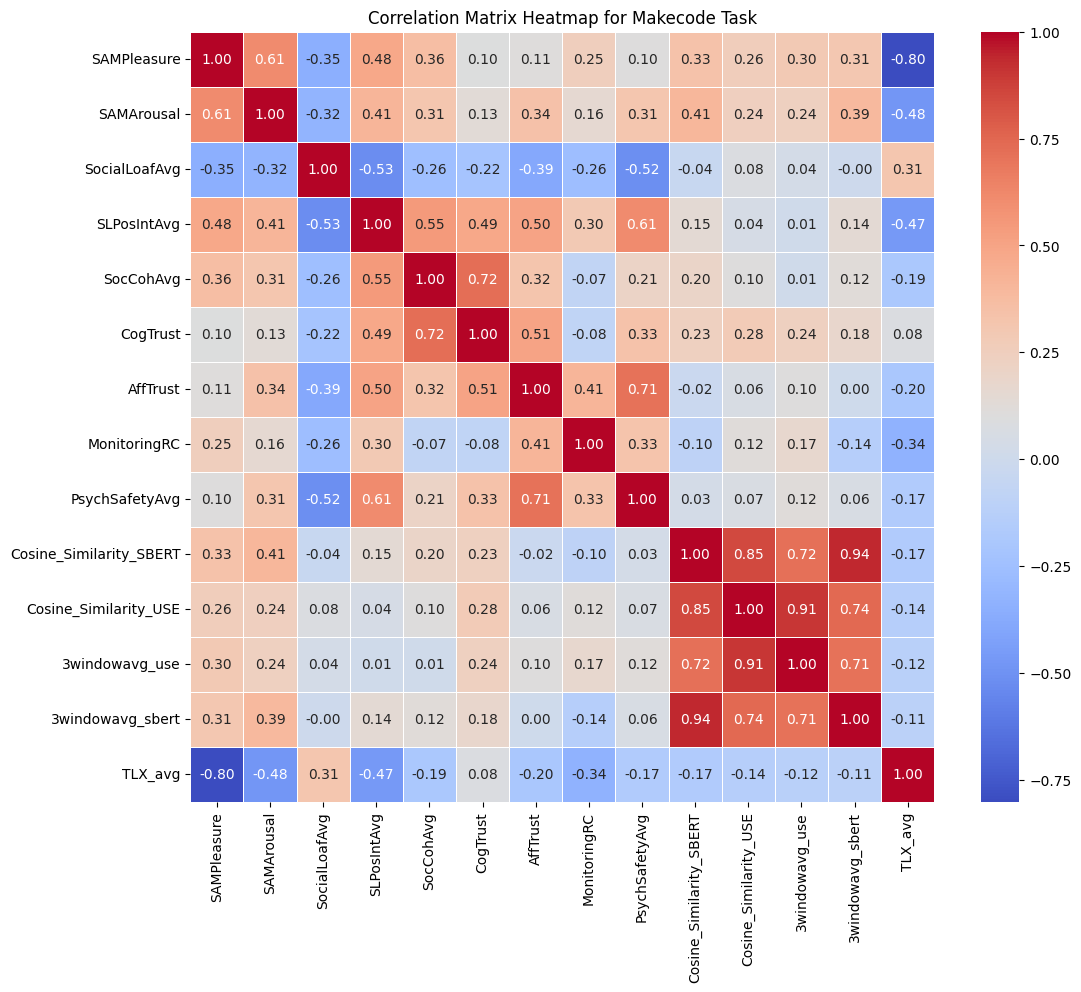

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap for Makecode Task')
plt.show()

## weights

In [35]:
import pandas as pd
round = pd.read_excel('/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Other Measures/means_perSessionIDRound.xlsx')
round.info()
round.set_index('Unnamed: 0', inplace=True)
round['TLX_avg']= round[['TLXMentalDemand', 'TLXRush', 'TLXSuccessRC']].mean(axis=1)
columns_to_drop = ['TLXMentalDemand', 'TLXRush', 'TLXSuccessRC']
round.drop(columns=columns_to_drop, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               60 non-null     int64  
 1   Session_ID               60 non-null     int64  
 2   Round                    60 non-null     int64  
 3   TLXMentalDemand          60 non-null     float64
 4   TLXRush                  60 non-null     float64
 5   TLXSuccessRC             60 non-null     float64
 6   SAMPleasure              60 non-null     float64
 7   SAMArousal               60 non-null     float64
 8   SocialLoafAvg            60 non-null     float64
 9   SLPosIntAvg              60 non-null     float64
 10  SocCohAvg                60 non-null     float64
 11  CogTrust                 60 non-null     float64
 12  AffTrust                 60 non-null     float64
 13  MonitoringRC             60 non-null     float64
 14  PsychSafetyAvg           60 

In [37]:

weights=round[round['Round'] != 4]
weights=weights.drop('Round',axis=1)
weights=weights.drop('Session_ID',axis=1)



In [38]:
correlation_matrix = weights.corr()
print(correlation_matrix)

                         SAMPleasure  SAMArousal  SocialLoafAvg  SLPosIntAvg  \
SAMPleasure                 1.000000    0.615024      -0.314588     0.525625   
SAMArousal                  0.615024    1.000000      -0.114438     0.017027   
SocialLoafAvg              -0.314588   -0.114438       1.000000    -0.486459   
SLPosIntAvg                 0.525625    0.017027      -0.486459     1.000000   
SocCohAvg                   0.015222    0.030490      -0.176953     0.267140   
CogTrust                    0.269728    0.077296      -0.042647     0.474569   
AffTrust                    0.604256    0.340349      -0.202895     0.687741   
MonitoringRC                0.068142   -0.090597      -0.199822     0.018645   
PsychSafetyAvg              0.503348    0.235636      -0.388414     0.567800   
Cosine_Similarity_SBERT     0.309417    0.389318       0.139343    -0.193959   
Cosine_Similarity_USE       0.305385    0.421972       0.126121    -0.256200   
3windowavg_use              0.301981    

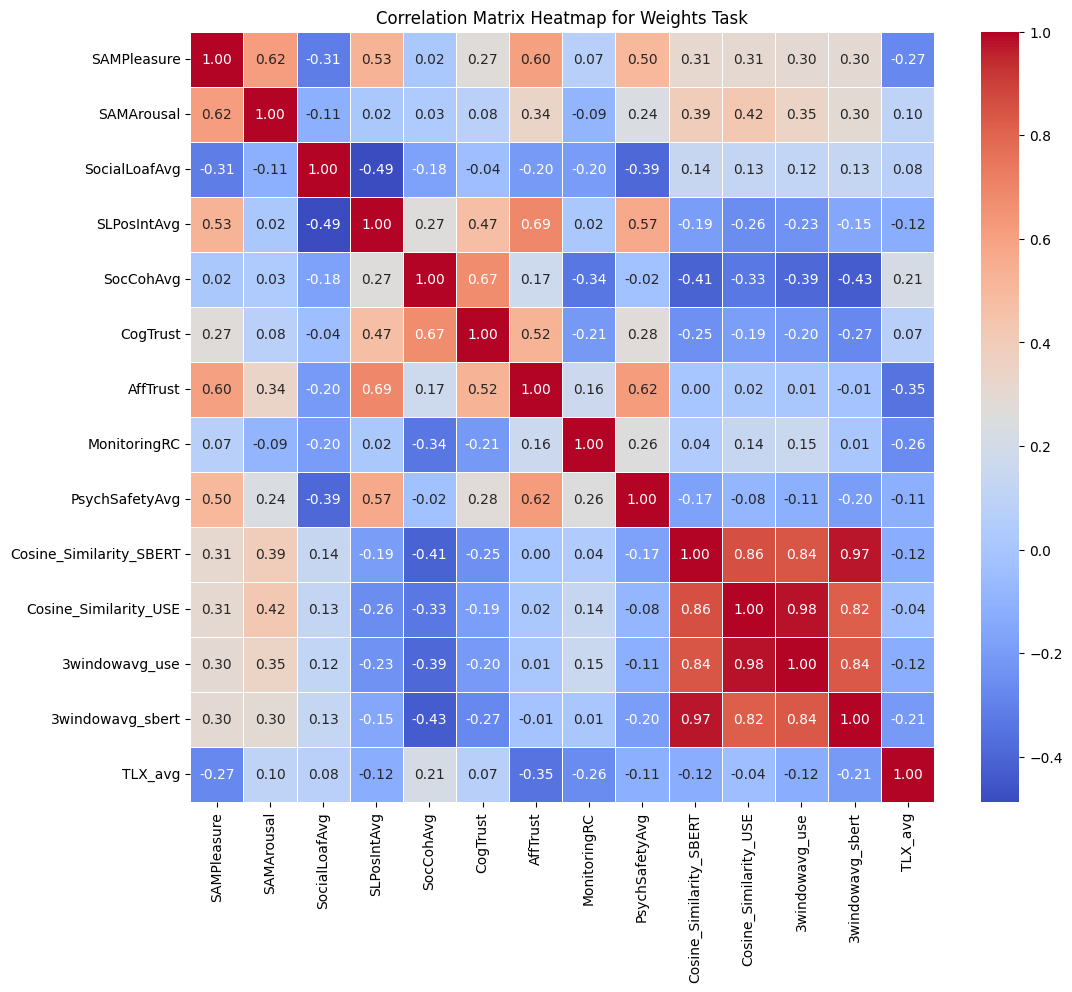

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap for Weights Task')
plt.show()

## Stat Tests

In [1]:
import pandas as pd
import statsmodels.api as sm

In [2]:
round = pd.read_excel('/Users/emilydoherty/Library/CloudStorage/OneDrive-UCB-O365/Emily_Papers/iSAT_discoursepaper2023/Other Measures/means_perSessionIDRound.xlsx')
#adding average of TLX variables to round df 
tlx_variables = ['TLXMentalDemand', 'TLXRush', 'TLXSuccessRC']
round['Average_TLX'] = round[tlx_variables].mean(axis=1)

In [ ]:
#MANOVA mulitple linear regression analysis
# dep variable (predictor)= TLXMentalDemand
X = sm.add_constant(round.drop(['TLXMentalDemand', 'Session_ID', 'Round'], axis=1))
y = round['TLXMentalDemand']
multivariate_model = sm.OLS(y, X).fit()
print(multivariate_model.summary())


In [ ]:
#MANOVA mulitple linear regression analysis
# dep variable (predictor)= SocialLoafAvg
X = sm.add_constant(round.drop(['SocialLoafAvg', 'Session_ID', 'Round'], axis=1))
y = round['SocialLoafAvg']
multivariate_model = sm.OLS(y, X).fit()
print(multivariate_model.summary())



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#predicting Average_TLX

# Selecting predictors (features) and the target variable
X = round.drop(['TLXMentalDemand','TLXRush','TLXSuccessRC', 'Session_ID', 'Round'], axis=1)
y=round['Average_TLX']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge regression model
alpha = 1.0  # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Print the coefficients
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': ridge_model.coef_
})
print(coefficients)


Mean Squared Error on Test Set: 0.05668607971991146
                   Variable  Coefficient
0                Unnamed: 0    -0.018393
1               SAMPleasure    -0.205328
2                SAMArousal     0.104007
3             SocialLoafAvg     0.017008
4               SLPosIntAvg    -0.056694
5                 SocCohAvg    -0.018553
6                  CogTrust     0.084351
7                  AffTrust    -0.076313
8              MonitoringRC    -0.029049
9            PsychSafetyAvg     0.045920
10  Cosine_Similarity_SBERT    -0.122890
11    Cosine_Similarity_USE     0.079498
12           3windowavg_use     0.002718
13         3windowavg_sbert    -0.040775
14              Average_TLX     4.431880


# Adding averaged features (tlx, posint)

In [ ]:
#adding average of TLX variables to round df 
tlx_variables = ['TLXMentalDemand', 'TLXRush', 'TLXSuccessRC']
round['Average_TLX'] = round[tlx_variables].mean(axis=1)

In [ ]:
#add group size 


## test for different hypotheses


In [ ]:
#social loafing
    # off topic conversation
    # ratio of conversation
    # team coherence 
    # affective words 

In [ ]:
# social cohesion   
    #team coherence
    #liwc personal pronouns 
    #MTF CPS 


In [ ]:
#tlx variables  
    # liwc cog processes, analytic, neg tone
    # team coherence
    # CSK CPS 

In [5]:
#psych safety   
    #team coherence
    #LIWC risk-taking, openess
    #utterance configuration

In [ ]:
#team success
    #team coherence
    #LIWC neg tone
    #Talk ratio
    #ratio of CPS 

In [ ]:
#Cognitive trust
    #team coherence
    #NEG CPS 

In [6]:
#affective trust 
    #LIWC affective words 
    #team coherence


In [ ]:
#group size
###Need to add group size to round datasheet 

In [ ]:
#Task (weights vs makecode)
#use round number (categorical)
#sig interactions = all 3 tlx variables, pleasure, success, pos int, cog trust 
